# Bootstrap

## 1. 

Generar 30 samples de una distribución Bernoulli de parámetro 𝑝 = 0.3.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

p = 0.3

samples = np.random.choice([0, 1], size=30, p=[1-p, p])

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0])

#### a) 
Encontrar el estimador plug-in del desvío estándar 𝜎 de la distribución.

In [34]:
# el plug-in estimator es simplemente suponer que la distribucion observada es la real

# entonces la varianza poblacional = varianza muestral

# varianza muestral de una bernoulli

sigma_plug_in = np.std(samples) #np.sqrt(p*(1-p))

In [35]:
sigma_plug_in

0.4714045207910316

### b) 
Estimar su error estándar usando bootstrap

Función que hice porque estaba al pedo:

In [52]:
def bootstrap(samples, N, funcion, histograma = False):
    """
    Realiza el método de bootstrap para estimar el estadístico deseado a partir de una muestra.
    Imprime el histograma si histograma == True.

    Parámetros:
    samples (numpy.ndarray): La muestra de la que se calculará el estadístico mediante bootstrap.
    N (int): El número de iteraciones de bootstrap a realizar.
    funcion (función de NumPy): La función que calcula el estadístico de interés.
    histrograma(bool): Booleano que decide si se imprime el histrograma de distribucion de los valores del estadistico

    Retorna:
    tuple: Un tuple conteniendo el valor estimado del estadístico y su error estándar.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    bootstrap_dataset = np.zeros(N)
    for i in range(N):
        draws = np.random.choice(samples, size= len(samples), replace = True)
        bootstrap_dataset[i] = funcion(draws)
    if histograma:
        plt.hist(bootstrap_dataset)
    return np.mean(bootstrap_dataset), np.std(bootstrap_dataset)

(array([  3.,  12.,   0.,  25.,   0.,  51.,  73., 267., 166., 403.]),
 array([0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44, 0.46, 0.48, 0.5 ]),
 <BarContainer object of 10 artists>)

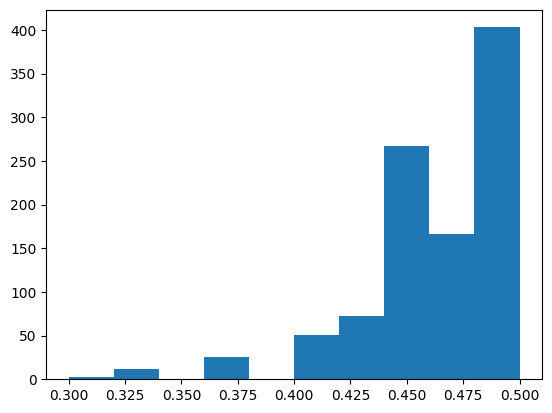

In [54]:
N = 1000
bootstrap_stds = np.zeros(N)
for i in range(N):
    draws = np.random.choice(samples, size= len(samples), replace=True)
    bootstrap_stds[i] = np.std(draws)
plt.hist(bootstrap_stds)

In [55]:
sigma_estimado = np.mean(bootstrap_stds)
se_sigma_estimado = np.std(bootstrap_stds)

print(f"sigma estimado usando bootstrap: {sigma_estimado}")
print(f"error estandar: {se_sigma_estimado}")

sigma estimado usando bootstrap: 0.46195837775071585
error estandar: 0.03425414011204697


### c) 
Encontrar un intervalo de confianza de nivel 0.95 usando los métodos normal, _percentile
bootstrap_, _basic bootstrap_ y _BCa_.

Creo que esto es _percentile bootstrap_

In [59]:
lower_bound = np.percentile(bootstrap_stds, 2.5)
upper_bound = np.percentile(bootstrap_stds, 97.5)
# 97.5 - 2.5 = 95
# el intervalo de confianza del 95% será aquel que cubra al 95% de los desvios estandar del histograma anterior

print(f"Intervalo de confianza del 95% para el desvío estándar estimado: {lower_bound, upper_bound}")


Intervalo de confianza del 95% para el desvío estándar estimado: (0.37267799624996495, 0.5)
